In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Section 1

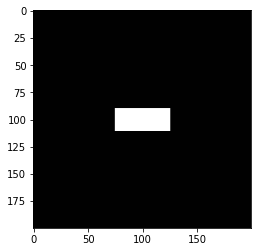

In [2]:
img = np.ones(shape=(200,200), dtype=np.uint8)
cv2.rectangle(img, pt1=(75, 90), pt2=(125, 110), color=(255,255,255), thickness=-1)

plt.imshow(img, cmap='gray',vmin=0, vmax=255);

## Section 2

### 1

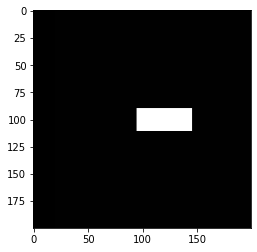

In [3]:
translation_matrix = np.array([[1, 0, 20], [0, 1, 0]], dtype=np.float64)

xshiftted_20 = cv2.warpAffine(img, translation_matrix, img.shape)
plt.imshow(xshiftted_20, cmap='gray', vmin = 0, vmax = 255)
plt.show()

### 2

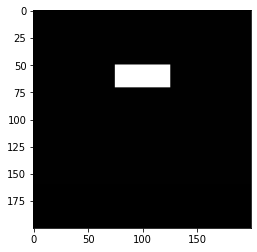

In [4]:
translation_matrix = np.array([[1, 0, 0], [0, 1, -40]], dtype=np.float64)

yshiftted_40 = cv2.warpAffine(img, translation_matrix, img.shape)
plt.imshow(yshiftted_40, cmap='gray', vmin = 0, vmax = 255)
plt.show()

### 3

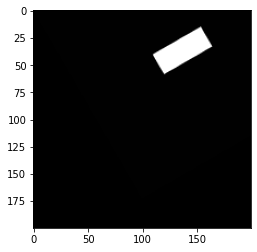

In [5]:
translation_matrix = np.array([[np.cos(np.pi/6), np.sin(np.pi/6), 0], [np.sin(-np.pi/6), np.cos(np.pi/6), 0]], dtype=np.float64)

rottated_30 = cv2.warpAffine(img, translation_matrix, img.shape)
plt.imshow(rottated_30, cmap='gray', vmin = 0, vmax = 255)
plt.show()

### 4

##### if you rotate `90` pic, totally turns black so we have to shift  picture down or easily change the `x` and `y`

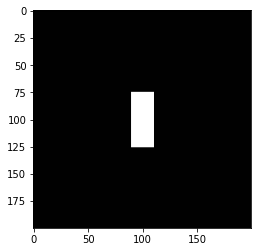

In [6]:
# shift picture down

translation_matrix = np.array([[np.cos(np.pi/2), np.sin(np.pi/2), 0], [np.sin(-np.pi/2), np.cos(np.pi/2), 200]], dtype=np.float64)

rottated_90 = cv2.warpAffine(img, translation_matrix, img.shape)
plt.imshow(rottated_90, cmap='gray', vmin = 0, vmax = 255)
plt.show()

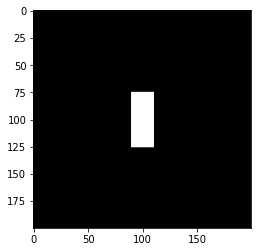

In [7]:
# change the `x` and `y`

translation_matrix = np.array([[0, 1, 0], [1, 0, 0]], dtype=np.float64)

rottated_90 = cv2.warpAffine(img, translation_matrix, img.shape)
plt.imshow(rottated_90, cmap='gray', vmin = 0, vmax = 255)
plt.show()

## Section 3

In [8]:
def fourier(image):
    fft = np.fft.fft2(image)
    return np.log(1 + np.abs(fft)), np.angle(fft)

def show_fourier(original=None, magnitude=None, phase=None, super_title="", figsize=(12, 6)):
    if magnitude is None and phase is None:
        magnitude, phase = fourier(original)
    
    fig, axs = plt.subplots(1, 3, figsize=figsize)
    fig.tight_layout()
    axs[0].imshow(original, cmap='gray')
    axs[0].set_title('Original')
    axs[1].imshow(magnitude, cmap='gray')
    axs[1].set_title('log(Magnitude)')
    axs[2].imshow(phase, cmap='gray')
    axs[2].set_title('Phase')
    fig.suptitle(super_title)
    plt.show()

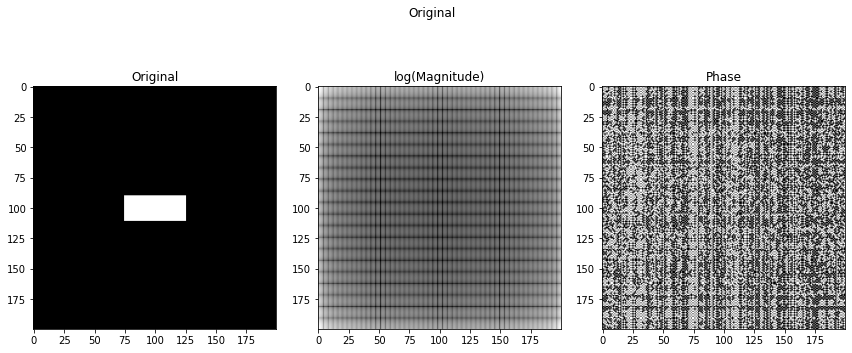

In [9]:
show_fourier(original=img, super_title="Original")

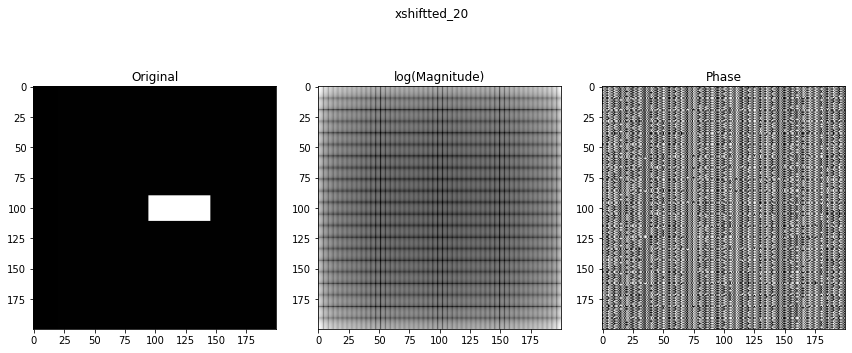

In [10]:
show_fourier(original=xshiftted_20, super_title="xshiftted_20")

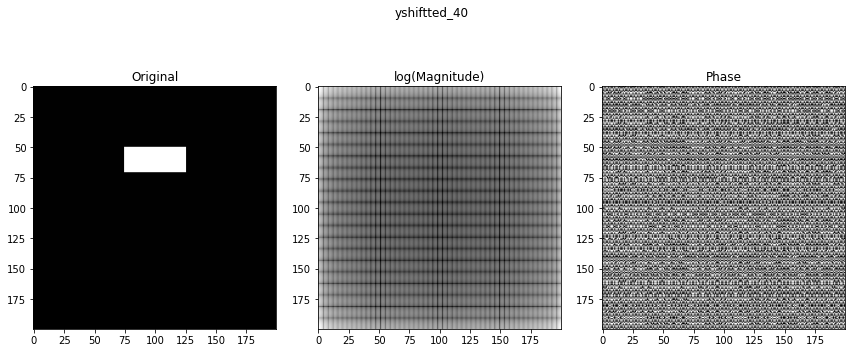

In [11]:
show_fourier(original=yshiftted_40, super_title="yshiftted_40")

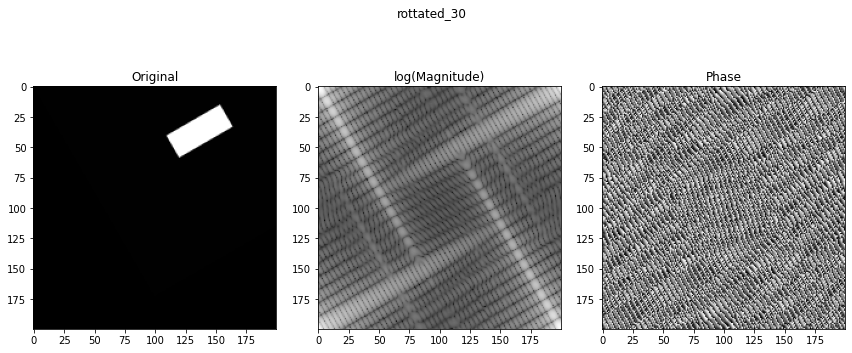

In [12]:
show_fourier(original=rottated_30, super_title="rottated_30")

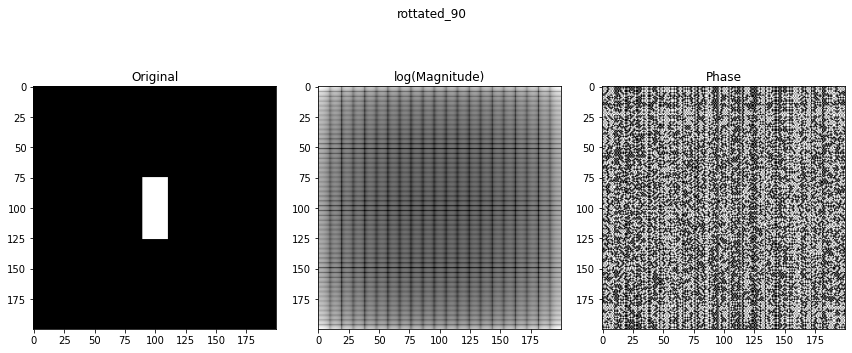

In [13]:
show_fourier(original=rottated_90, super_title="rottated_90")

## Section 4

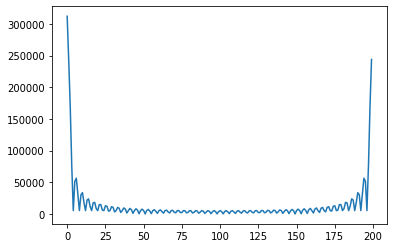

In [14]:
fft = np.fft.fft2(img)
row = fft[0, :]
row = np.abs(row)
plt.plot(row)
plt.show()

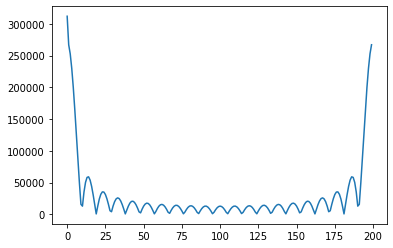

In [15]:
col = fft[:, 0]
col = np.abs(col)
plt.plot(col)
plt.show()

## Section 5

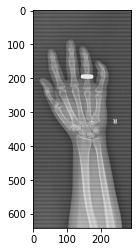

In [16]:
metacarpal = cv2.imread("./metacarpal.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(metacarpal, cmap='gray');

## Section 6

In [17]:
f_metacarpal = np.fft.fft2(metacarpal)
f_shift_metacarpal = np.fft.fftshift(f_metacarpal)

## Section 7

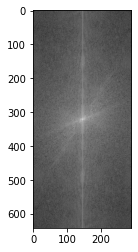

In [18]:
plt.imshow(np.log(1 + np.abs(f_shift_metacarpal)), cmap="gray");

In [19]:
def inverse_fourier(f):
    ishift_f = np.fft.ifftshift(f)
    image = np.fft.ifft2(ishift_f)
    image = np.abs(image)
    return image

def filter_pass(center, r, shape, mod):
    cx, cy = center
    if mod == "high":
        return np.fromfunction(lambda i,j: (i - cx) ** 2 + (j - cy) ** 2 <= r ** 2, shape, dtype=float)
    if mod == "low":
        return np.fromfunction(lambda i,j: (i - cx) ** 2 + (j - cy) ** 2 > r ** 2, shape, dtype=float)

def band_reject(center, upper, lower, shape):
    f1 = filter_pass(center, upper, shape, "high")
    f2 = filter_pass(center, lower, shape, "low")
    return f1 + f2

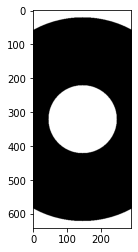

In [20]:
band_reject_filter = band_reject((f_shift_metacarpal.shape[0] // 2, f_shift_metacarpal.shape[1] // 2),
                                 100 ,
                                 300 ,
                                 f_shift_metacarpal.shape)

plt.imshow(band_reject_filter, cmap='gray');

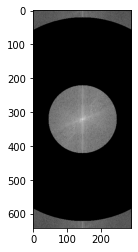

In [21]:
band_rejected_f_shift_metacarpal = band_reject_filter * f_shift_metacarpal
plt.imshow(np.log(1 + np.abs(band_rejected_f_shift_metacarpal)), cmap='gray');

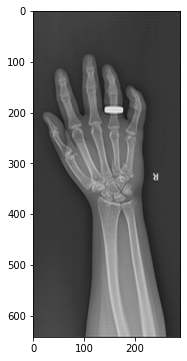

In [22]:
retrieved_image = inverse_fourier(band_rejected_f_shift_metacarpal)
plt.figure(figsize=(3, 6))
plt.imshow(np.abs(retrieved_image), cmap='gray');

## Section 8

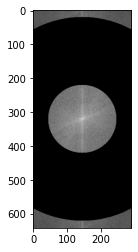

In [23]:
def reverse(image):
    res = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            res[i, j] = image[image.shape[0] - i - 1, image.shape[1] - j - 1]
    return res

reversed_band_rejected_f_shift_metacarpal = reverse(band_rejected_f_shift_metacarpal)
plt.imshow(np.log(1 + np.abs(reversed_band_rejected_f_shift_metacarpal)), cmap='gray');

## Section 9

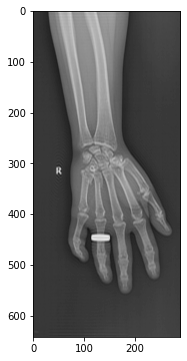

In [24]:
reversed_retrieved_image = inverse_fourier(reversed_band_rejected_f_shift_metacarpal)
plt.figure(figsize=(3, 6))
plt.imshow(np.abs(reversed_retrieved_image), cmap='gray');

## Section 10

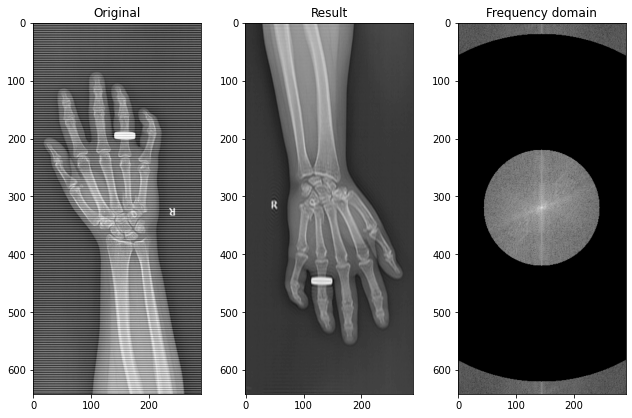

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(9, 6))
fig.tight_layout()

axs[0].imshow(metacarpal, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(np.abs(reversed_retrieved_image), cmap='gray')
axs[1].set_title('Result')
axs[2].imshow(np.log(1 + np.abs(reversed_band_rejected_f_shift_metacarpal)), cmap='gray')
axs[2].set_title('Frequency domain')
plt.show()